# Fashion Analysis using PySpark

In [1]:
import pyspark
import findspark

In [2]:
import pyspark
from pyspark.sql import SparkSession

# create a spark session
spark = SparkSession.builder.appName('fashion').getOrCreate()

# create a dataframe from the csv file
fashion_df = spark.read.csv('fashiondataset.csv', inferSchema=True, header=True)


23/01/04 19:50:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
import pandas as pd

# Read the Excel file into a Pandas DataFrame
pandas_df = pd.read_excel('fashion_brand_details.xlsx')

# Convert the Pandas DataFrame into a Spark DataFrame
brand_df = spark.createDataFrame(pandas_df)

/Users/oscar/opt/anaconda3/envs/spark-env/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:327: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [4]:
# diplays the schema
fashion_df.printSchema()

root
 |-- p_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: string (nullable = true)
 |-- colour: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- ratingCount: string (nullable = true)
 |-- avg_rating: string (nullable = true)
 |-- description: string (nullable = true)
 |-- p_attributes: string (nullable = true)



In [5]:
# display the fashion table
fashion_df.show(10)

+--------+--------------------+-----+-------+--------------+-----------+-----------+--------------------+--------------------+
|    p_id|                name|price| colour|         brand|ratingCount| avg_rating|         description|        p_attributes|
+--------+--------------------+-----+-------+--------------+-----------+-----------+--------------------+--------------------+
| 1518329|Dupatta Bazaar Wh...|  899|  White|Dupatta Bazaar|       1321|4.548826646|White embroidered...|{'Occasion': 'Dai...|
| 5829334|Roadster Women Mu...| 1199|Mustard|      Roadster|       5462|4.313255218|"Mustard yellow s...|{'Body Shape ID':...|
|10340119|Inddus Peach-Colo...| 5799|  Peach|        Inddus|        145|4.068965517|Peach-Coloured an...|{'Bottom Fabric':...|
|10856380|SASSAFRAS Women B...| 1499|  Black|     SASSAFRAS|       9124|4.147523016|"Black solid wove...|{'Add-Ons': 'NA',...|
|12384822|Kotty Women Black...| 1999|  Black|         Kotty|      12260|4.078466558|"Black dark wash ...|{'Add-

In [6]:
# display the first 10 rows of the brand 
brand_df.show(10)

+--------+---------------+
|brand_id|     brand_name|
+--------+---------------+
|       1|            513|
|       2|           109F|
|       3|      20Dresses|
|       4|    250 Designs|
|       5|           3Pin|
|       6|  6Y Collective|
|       7|98 Degree North|
|       8|     9Teenagain|
|       9| A Little Fable|
|      10|       A.T.U.N.|
+--------+---------------+
only showing top 10 rows



In [19]:
spark.sql("DROP DATABASE IF EXISTS fashion_db CASCADE")

DataFrame[]

In [21]:
# create a database
spark.sql('CREATE DATABASE IF NOT EXISTS fashion_db')

DataFrame[]

In [22]:
spark.sql('SHOW DATABASES').show()

+----------+
| namespace|
+----------+
|   default|
|fashion_db|
+----------+



In [23]:
spark.sql('USE fashion_db')

DataFrame[]

In [24]:
spark.sql('SHOW TABLES').show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
+--------+---------+-----------+



In [27]:
fashion_df.write.saveAsTable('fashion_db.fashion_table')

In [28]:
brand_df.write.saveAsTable('fashion_db.brand_table')

In [16]:
# check if the tables are created in the database
spark.sql('USE fashion_db').show()

++
||
++
++



In [17]:
# check if the tables are created in the database
spark.sql('SHOW TABLES').show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
+--------+---------+-----------+



In [29]:
# select from the fashion table
spark.sql('SELECT * FROM fashion_db.fashion_table LIMIT 5').show()

+--------+--------------------+-----+-------+--------------+-----------+-----------+--------------------+--------------------+
|    p_id|                name|price| colour|         brand|ratingCount| avg_rating|         description|        p_attributes|
+--------+--------------------+-----+-------+--------------+-----------+-----------+--------------------+--------------------+
| 1518329|Dupatta Bazaar Wh...|  899|  White|Dupatta Bazaar|       1321|4.548826646|White embroidered...|{'Occasion': 'Dai...|
| 5829334|Roadster Women Mu...| 1199|Mustard|      Roadster|       5462|4.313255218|"Mustard yellow s...|{'Body Shape ID':...|
|10340119|Inddus Peach-Colo...| 5799|  Peach|        Inddus|        145|4.068965517|Peach-Coloured an...|{'Bottom Fabric':...|
|10856380|SASSAFRAS Women B...| 1499|  Black|     SASSAFRAS|       9124|4.147523016|"Black solid wove...|{'Add-Ons': 'NA',...|
|12384822|Kotty Women Black...| 1999|  Black|         Kotty|      12260|4.078466558|"Black dark wash ...|{'Add-

In [30]:
# select from the brand table
spark.sql('SELECT * FROM fashion_db.brand_table LIMIT 5').show()

+--------+-----------+
|brand_id| brand_name|
+--------+-----------+
|       1|        513|
|       2|       109F|
|       3|  20Dresses|
|       4|250 Designs|
|       5|       3Pin|
+--------+-----------+



In [31]:
# select data from both tables and create a main dataframe to be used for analysis
main_df = spark.sql('SELECT * FROM fashion_db.fashion_table INNER JOIN fashion_db.brand_table ON fashion_db.fashion_table.brand = fashion_db.brand_table.brand_name LIMIT 10')

In [32]:
# display the main dataframe
main_df.show(10)

+--------+--------------------+-----+-------+--------------+-----------+-----------+--------------------+--------------------+--------+--------------+
|    p_id|                name|price| colour|         brand|ratingCount| avg_rating|         description|        p_attributes|brand_id|    brand_name|
+--------+--------------------+-----+-------+--------------+-----------+-----------+--------------------+--------------------+--------+--------------+
| 1518329|Dupatta Bazaar Wh...|  899|  White|Dupatta Bazaar|       1321|4.548826646|White embroidered...|{'Occasion': 'Dai...|     242|Dupatta Bazaar|
| 5829334|Roadster Women Mu...| 1199|Mustard|      Roadster|       5462|4.313255218|"Mustard yellow s...|{'Body Shape ID':...|     750|      Roadster|
|10340119|Inddus Peach-Colo...| 5799|  Peach|        Inddus|        145|4.068965517|Peach-Coloured an...|{'Bottom Fabric':...|     389|        Inddus|
|12384822|Kotty Women Black...| 1999|  Black|         Kotty|      12260|4.078466558|"Black dar

### Data Analysis with Pyspark

In [33]:
# create a pandas dataframe from the main dataframe
main_df_pd = main_df.toPandas()

# display the first 5 rows of the pandas dataframe
main_df_pd.head()


,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899,White,Dupatta Bazaar,1321,4.548826646,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242,Dupatta Bazaar
1,5829334,Roadster Women Mustard Yellow Solid Hooded Swe...,1199,Mustard,Roadster,5462,4.313255218,"""Mustard yellow solid sweatshirt, has a hood, ...","{'Body Shape ID': '443,424,324', 'Body or Garm...",750,Roadster
2,10340119,Inddus Peach-Coloured & Beige Unstitched Dress...,5799,Peach,Inddus,145,4.068965517,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt...",389,Inddus
3,12384822,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999,Black,Kotty,12260,4.078466558,"""Black dark wash 4-pocket high-rise jeans, cle...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo...",482,Kotty
4,14021452,Sera Women Multicoloured Printed Tie-Up Shrug,1494,Multi,Sera,750,4.288,"Brown and blue printed tie-up longline shrug, ...",{'Body or Garment Size': 'To-Fit Denotes Body ...,793,Sera


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

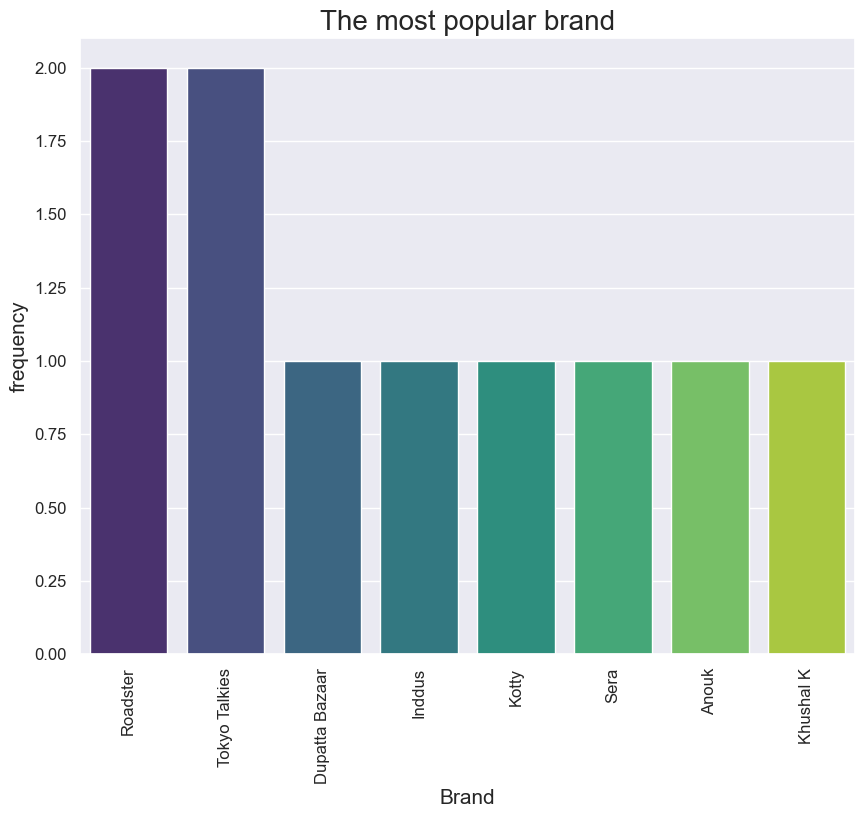

In [35]:
# What is the most popular brand?
plt.figure(figsize=(10,8))
sns.countplot(x='brand', data=main_df_pd, order=main_df_pd['brand'].value_counts().index[:10],palette='viridis',orient='h')

plt.title('The most popular brand',fontsize=20)
plt.xlabel('Brand',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The most popular brands are Roadster and Tokyo Talkies

In [36]:
main_df_pd.dtypes

p_id            object
name            object
price           object
colour          object
brand           object
ratingCount     object
avg_rating      object
description     object
p_attributes    object
brand_id         int64
brand_name      object
dtype: object

In [37]:
# typecast the columns to the correct data type
main_df_pd['price'] = main_df_pd['price'].astype('float')

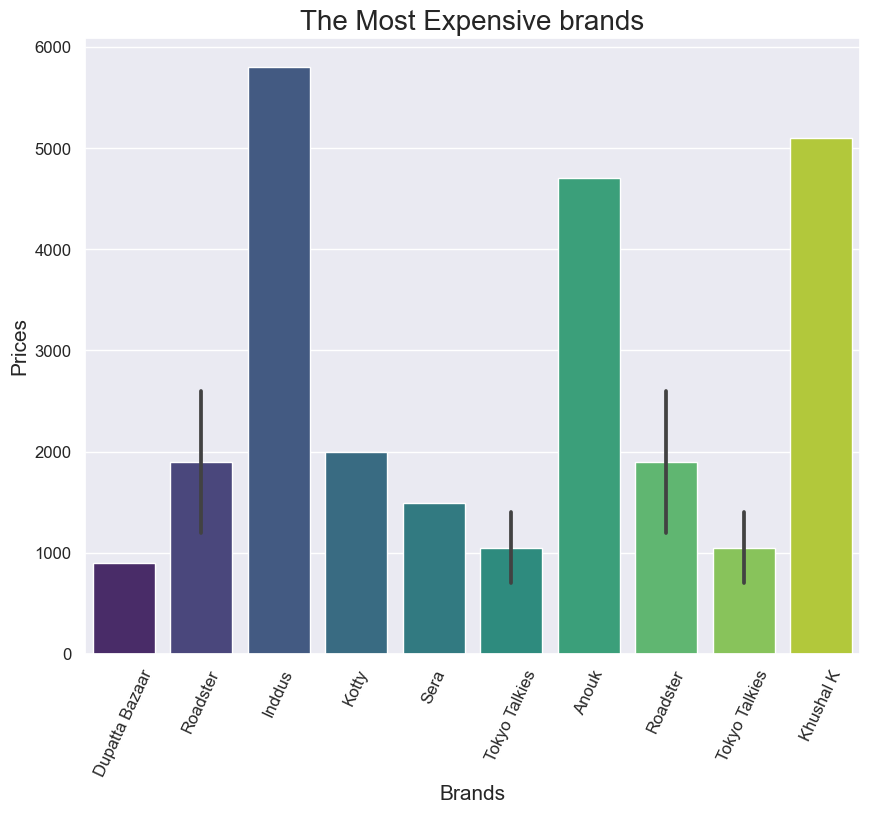

In [38]:
# what are the most expensive brands?
plt.figure(figsize=(10,8))
sns.barplot(x=main_df_pd['brand'], y=main_df_pd['price'] , data=main_df_pd ,order=main_df_pd['brand'],palette='viridis')
plt.title("The Most Expensive brands",fontsize=20)
plt.xlabel("Brands",fontsize=15)
plt.ylabel("Prices",fontsize=15)
plt.xticks(rotation=65,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The most expensive brand is Inddus  

In [39]:
# close the connection
spark.stop()

### Machine Learning with Pyspark

In [ ]:
# machine learning
